In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
def scores_summary(scores):
    print(scores)
    print(np.mean(scores))
    print(np.std(scores))

In [3]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [4]:
df_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
df_train.shape

(42000, 785)

In [41]:
df_test.shape

(28000, 784)

In [8]:
df_train['label'].value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

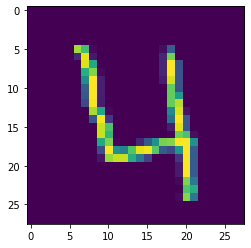

In [9]:
image = np.array(df_train[3:4].drop('label', axis=1))
plt.imshow(image.reshape(28,28))

In [4]:
from sklearn.model_selection import train_test_split

X = df_train.drop('label', axis=1)
y = df_train['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [5]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit_transform(X_train)
scaler.fit(X_test)
scaler.fit(df_test)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.98) 
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [25]:
X_train_pca.shape

(33600, 260)

In [26]:
X_test_pca.shape

(8400, 260)

In [12]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

log_reg_clf = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, n_jobs=-1)
log_reg_scores = cross_val_score(log_reg_clf, X_train, y_train, cv=5, n_jobs=-1)
scores_summary(log_reg_scores)

[0.8810232  0.88931866 0.88870704 0.8902784  0.8869863 ]
0.8872627185491039
0.003298946752072321


In [17]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier()
sgd_scores = cross_val_score(sgd_clf, X_train, y_train, cv=5, n_jobs=-1)
scores_summary(sgd_scores)

[0.86555622 0.87325201 0.86341318 0.88104809 0.87432996]
0.8715198905365682
0.006371300674958367


In [7]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=500, warm_start=True, n_jobs=-1, criterion='gini')
rf_scores = cross_val_score(rf_clf, X_train, y_train, cv=3, n_jobs=-1)
scores_summary(rf_scores)

[0.96356336 0.96206486 0.96146407 0.96471639 0.96560453]
0.9634826404782151
0.0015566495044467207


from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier()
gb_scores = cross_val_score(gb_clf, X_train, y_train, cv=5, n_jobs=-1)
scores_summary(gb_scores)

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

clfs = [LogisticRegression(), SGDClassifier(), SVC(), DecisionTreeClassifier(), RandomForestClassifier(), 
       GradientBoostingClassifier(), XGBClassifier()]

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression())
])

pipeline.fit_transform(X_train, y_train)

for classifier in clfs:
    clfs_scores = cross_val_score(pipeline, classifier=classifier, cv=5 )
    print('--------------------------------------------------------------------------------------')
    scores_summary(clfs.scores)

In [8]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

svc_clf = SVC(kernel='poly', C=1, degree=3, gamma=.1, coef0=10)
svc_scores = cross_val_score(svc_clf, X_train_pca, y_train, cv=5, n_jobs=-1)
scores_summary(svc_scores)

[0.97709697 0.97887533 0.98080643 0.97960399 0.98079214]
0.9794349712964557
0.0013806392063394693


In [16]:
from sklearn.metrics import confusion_matrix, classification_report
svc_clf.fit(X_train_pca, y_train)
pred = svc_clf.predict(X_test_pca)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[809   0   1   0   1   0   4   0   1   0]
 [  0 904   2   0   1   0   1   1   0   0]
 [  2   3 829   1   4   2   1   0   3   1]
 [  1   0   3 913   0   6   0   5   7   2]
 [  1   0   0   0 824   0   4   1   1   8]
 [  0   1   0   5   1 683   4   1   6   1]
 [  2   1   1   0   0   2 776   0   3   0]
 [  0   3   4   0   1   1   0 876   2   6]
 [  0   1   1   2   3   2   0   1 824   1]
 [  0   0   2   6   8   3   0   7   3 809]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       816
           1       0.99      0.99      0.99       909
           2       0.98      0.98      0.98       846
           3       0.98      0.97      0.98       937
           4       0.98      0.98      0.98       839
           5       0.98      0.97      0.98       702
           6       0.98      0.99      0.99       785
           7       0.98      0.98      0.98       893
           8       0.97      0.99      0.98       835
           9       0.98     

In [ ]:
from sklearn.model_selection import GridSearchCV
svc_params = [{
    'C':[.09,0.1,0.2],
    'gamma':[.001,.01,.02,],
    'coef0':[110,90,100],
}]

svc_grid = GridSearchCV(svc_clf, svc_params, cv=10)
svc_grid.fit(X_train_pca, y_train)

In [23]:
svc_grid.best_params_

{'C': 0.09, 'coef0': 110, 'gamma': 0.001}

In [24]:
cross_val_score(svc_grid.best_estimator_, X_train_pca, y_train, cv=2, n_jobs=-1)

array([0.97637186, 0.97916419])

In [27]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(n_estimators=1000, objective='multi:softmax', nthread=4, max_depth=6,min_child_weight=11,
                       silent=1,subsample=0.8,colsample_bytree=0.7,missing=-999,seed=1337)
xgb_scores = cross_val_score(xgb_clf, X_train, y_train, cv=2, n_jobs=-1)
scores_summary(xgb_scores)

[0.96256398 0.96523396]
0.9638989684509491
0.0013349879724346425


In [13]:
from sklearn.neighbors import KNeighborsClassifier

kn_clf = KNeighborsClassifier(n_jobs=-1)
kn_scores = cross_val_score(kn_clf, X_train, y_train, cv=2, n_jobs=-1)
scores_summary(kn_scores)

[0.95750506 0.95820931]
0.9578571847768875
0.0003521258553306206


In [25]:
from sklearn.ensemble import VotingClassifier

estimators = [
    ('rf', rf_clf),
    ('kn', kn_clf)
]
voting_clf = VotingClassifier(estimators=estimators, voting='soft', n_jobs=-1)
cross_val_score(voting_clf, X_train, y_train, cv=2, n_jobs=-1)


array([0.96268301, 0.96511489])

In [32]:
from sklearn.naive_bayes import MultinomialNB

mnb_clf = MultinomialNB()
mnb_clf.fit(X_train, y_train)
cross_val_score(mnb_clf, X_train, y_train, cv=3)

array([0.82238486, 0.82382356, 0.82807895])

In [8]:
from sklearn.model_selection import GridSearchCV

params = [{
    'n_estimators': [500],
    #'criterion':['gini','entropy'],
    #'max_depth':
    #'min_samples_split':
    #'min_samples_leaf'
    #'min_weight_fraction_leaf'
    'max_features':[0.8,0.9],
    #'max_leaf_nodes':[]
    #'min_impurity_decrease'
    #'min_impurity_split'
    #'bootstrap'
    #'warm_start':True,
    #'max_samples':[0.8,0.9]
}]

rf_grid = GridSearchCV(rf_clf, params, cv=2)
rf_grid.fit(X_train, y_train)

GridSearchCV(cv=2, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=500, n_jobs=-1,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=True),
             iid='warn

In [9]:
rf_grid.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=0.8, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=True)

In [10]:
rf_grid.best_params_

{'max_features': 0.8, 'n_estimators': 500}

In [11]:
cross_val_score(rf_grid.best_estimator_, X_train, y_train, cv=2, n_jobs=-1)

array([0.94524461, 0.94713656])

In [48]:
X_test

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
5457,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
38509,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
25536,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
31803,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,249,210,20,0,0,0,0,0,0,0,0,0,0,0,0
39863,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8388,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
29359,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
40276,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18421,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [10]:
from keras.preprocessing.image import ImageDataGenerator
aug = ImageDataGenerator(
        rotation_range=20,
        zoom_range=0.15,
        width_shift_range=0.10,
        height_shift_range=0.10,
        shear_range=0.10,
        #horizontal_flip=True,
        fill_mode="nearest")

iterator = aug.flow(X_train_cnn, y_train_cnn, batch_size=8)


In [8]:
image_height = 28 
image_width = 28
num_channels = 1  # we have grayscale images
# NOTE: image_height == image_width == 28

X_train_cnn = X_train.values.reshape(-1,28,28,1)
X_test_cnn = X_test.values.reshape(-1,28,28,1)

y_train_cnn = to_categorical(y_train)
y_test_cnn = to_categorical(y_test)

In [9]:
#global variables
image_ht, image_wd, image_shape, n_classes = 28, 28, (28,28,1), 10

# training parameters
n_epochs, batch_size = 50, 1000

# for loading & saving model state
cnn_model = 'MNIST_cnn'

In [7]:
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Dropout, BatchNormalization
from keras.activations import relu, elu, sigmoid, softmax
from keras.models import Sequential
from keras.optimizers import adam
from keras.utils.np_utils import to_categorical

In [17]:
model = Sequential()

model.add(Conv2D(input_shape = image_shape, filters=32, kernel_size=(3,3), padding='same', activation='relu'))

model.add(Conv2D(input_shape = image_shape, filters=32, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(input_shape = image_shape, filters=64, kernel_size=(3,3), padding='same', activation='relu'))

model.add(Conv2D(input_shape = image_shape, filters=64, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))

model.add(Conv2D(filters=128, kernel_size=(1,1), padding='valid', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(filters=256, kernel_size=(1,1), padding='valid', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer ='adam', metrics=['acc'])

In [20]:
model.fit(X_train_cnn, y_train_cnn, epochs=7, validation_data=(X_test_cnn, y_test_cnn),
     workers=-1, use_multiprocessing=True, initial_epoch=5)

Train on 33600 samples, validate on 8400 samples
Epoch 6/7
33600/33600 [==============================] - 112s 3ms/step - loss: 0.0371 - acc: 0.9899 - val_loss: 0.0618 - val_acc: 0.9823
Epoch 7/7
33600/33600 [==============================] - 116s 3ms/step - loss: 0.0308 - acc: 0.9915 - val_loss: 0.0435 - val_acc: 0.9892


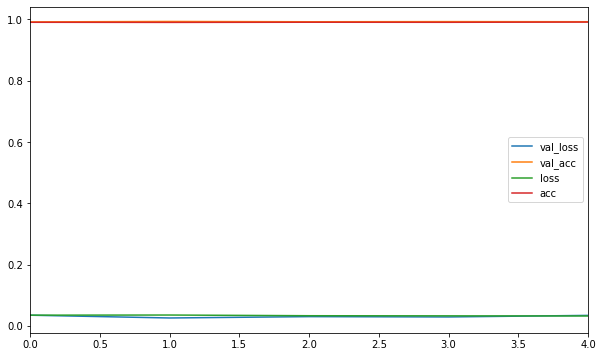

In [57]:
dl_model_loss = pd.DataFrame(model.history.history)
dl_model_loss.plot(figsize=(10,6))

In [30]:
predictions = model.predict_classes(df_test.values.reshape(-1,28,28,1))

In [32]:
predictions.shape

(28000,)

In [72]:
submissions = pd.DataFrame({"ImageId": list(range(1,len(predictions)+1)),
    "Label": predictions})
submissions.to_csv("DR.csv", index=False, header=True)

In [73]:
submissions

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9
